In [1]:
import numpy as np
import pandas as pd 
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import datasets
from tensorflow.keras import utils
from sklearn.datasets import load_files

2022-04-05 07:35:42.241744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 07:35:42.241776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# system data
train_dir = './images/train'
test_dir = './images/test'
valid_dir = './images/valid'

# images will be rescaled by 1./255
train_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                        shear_range=0.2, 
                                                                        zoom_range=0.2, 
                                                                        horizontal_flip=True)

test_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# images in batches of 10
# number of samples processed before the model is updated
train_generator = train_data_generation.flow_from_directory(train_dir, target_size=(200, 200), 
                                                            batch_size=10, class_mode='categorical')

validation_generator = test_data_generation.flow_from_directory(valid_dir, target_size=(200, 200), 
                                                                batch_size=10, class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [3]:
# training a model with 98% accuracy
class get_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [4]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')])

model.summary()

2022-04-05 07:36:01.534345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 07:36:01.534385: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 07:36:01.534408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wolli): /proc/driver/nvidia/version does not exist
2022-04-05 07:36:01.548205: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
print('Compiled!')

callbacks = get_Callback()
history = model.fit(train_generator, batch_size = 32, epochs=20, validation_data=validation_generator, callbacks=[callbacks], verbose=1, shuffle=True)

Compiled!
Epoch 1/20
166/166 [==============================] - 104s 612ms/step - loss: 1.9709 - accuracy: 0.3321 - val_loss: 2.1453 - val_accuracy: 0.1667
Epoch 2/20
166/166 [==============================] - 101s 609ms/step - loss: 1.0948 - accuracy: 0.6021 - val_loss: 0.8293 - val_accuracy: 0.7361
Epoch 3/20
166/166 [==============================] - 101s 610ms/step - loss: 0.7410 - accuracy: 0.7591 - val_loss: 0.2310 - val_accuracy: 0.9028
Epoch 4/20
166/166 [==============================] - 134s 810ms/step - loss: 0.5458 - accuracy: 0.8273 - val_loss: 0.5166 - val_accuracy: 0.7500
Epoch 5/20
166/166 [==============================] - 110s 661ms/step - loss: 0.5272 - accuracy: 0.8418 - val_loss: 0.6891 - val_accuracy: 0.9306
Epoch 6/20
166/166 [==============================] - 117s 707ms/step - loss: 0.4747 - accuracy: 0.8665 - val_loss: 0.0903 - val_accuracy: 0.9722
Epoch 7/20
166/166 [==============================] - 117s 703ms/step - loss: 0.4274 - accuracy: 0.8702 - val_loss

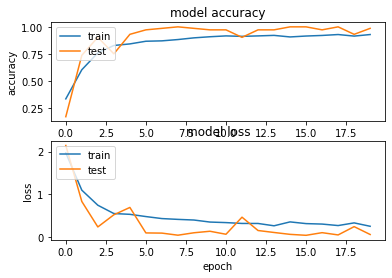

In [6]:
# plotting graphs
plt.figure(1)  
# history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
# history for loss    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [7]:
def get_load_dataset(path):
    data = sk.datasets.load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [8]:
x_test, y_test, target_labels = get_load_dataset(test_dir)

number_of_classes = len(np.unique(y_test))
number_of_classes

y_test = tf.keras.utils.to_categorical(y_test,number_of_classes)

In [9]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(file)))
    return images_as_array


x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [20]:
# visualize test prediction.
y_pred = model.predict(x_test)

ValueError: num must be 1 <= num <= 4, not 5

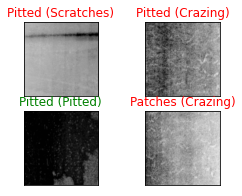

In [28]:
# plot a raandom sample of test images, their predicted labels, and ground truth
figure = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    axis = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    axis.imshow(np.squeeze((x_test[idx] * 255).astype(np.uint8)))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    axis.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

7